Osnabrück University - Computer Vision (Winter Term 2024/25) - Dr. Ulf Krumnack, Lukas Niehaus, Robin Rawiel

# Exercise Sheet 01: Image Enhancement & Color

## Introduction

This is the first "real" homework sheet.

The homework sheets will usually be available at the beginning of the week and are supposed to be solved in groups. They have to be handed in before the next practice session (Monday evening). The exercises are then presented to your tutor in a small feedback session. To acquire the admission for the final exam, you will have to pass 𝑁−2 of the weekly provided exercise sheets.

Sign up for a group on Stud.IP if you have not already done so (See Participants -> Functions/Groups). The times mentioned there are the times for the feedback session of your group. If none of them fits, send any of the tutors an e-mail so we can try to arrange something.

Your group will have a group folder in Stud.IP under Documents. Upload your solutions there to hand them in.

This week's sheet should be solved and handed in before end of **Monday, November 17, 2024**. Please upload your results to your group's Stud.IP folder.

## Assignment 1: Computing Contrast and Entropy (5 points)


### a) Computing contrast

Provide functions to compute the global contrast, local contrast, and entropy of an image.

Global contrast: 1.0000 (min=0, max=255)


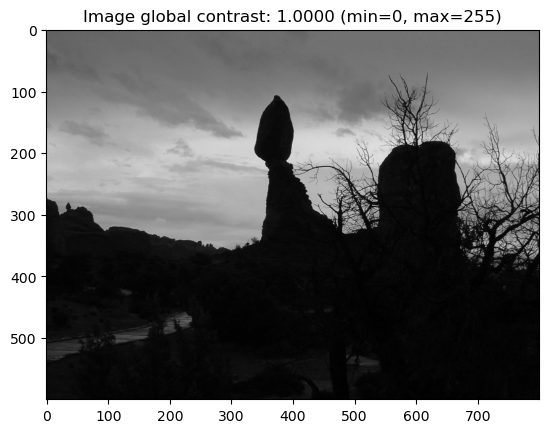

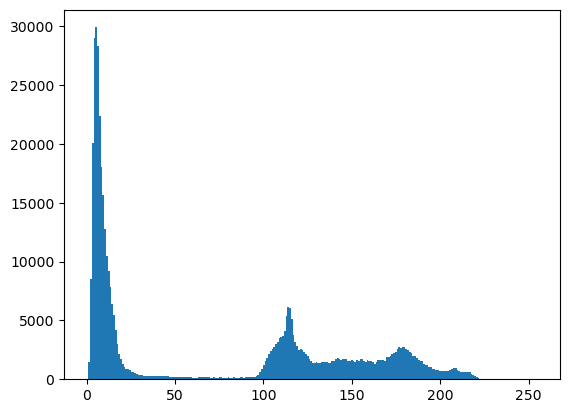

In [1]:
%matplotlib inline
import numpy as np
from imageio.v2 import imread
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

def global_contrast(img, value_range=None):
    # determine range: simplified, just checks for uint8 
    if value_range is None:
        value_range = (0, 255) if img.dtype == np.uint8 else (0., 1.)

    # Compute contrast
    contrast = (img.max() - img.min()) / (value_range[1] - value_range[0])

    return contrast

img = imread('images/dark.png')
result = global_contrast (img)
print ("Global contrast: {:.4f} (min={}, max={})".format(result, img.min(), img.max()))
plt.title("Image global contrast: {:.4f} (min={}, max={})".format(result, img.min(), img.max()))
plt.imshow(img, vmin=0, vmax=255)
plt.show()

plt.hist(img.flatten(), 256, (0, 255))
plt.show()

Local contrast: 2.8745


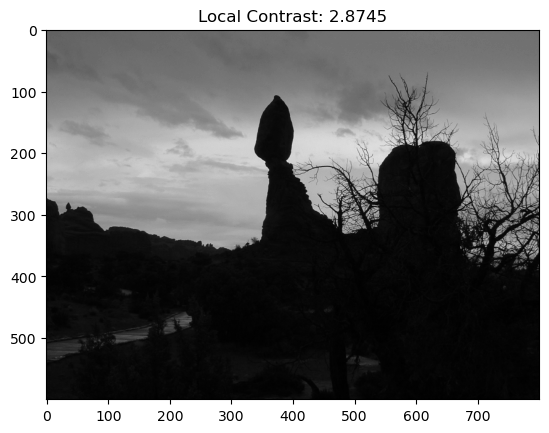

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from imageio.v2 import imread
from scipy.ndimage import convolve


def local_contrast(img):
    
    # Local contrast as the standard deviation of pixel values
    # Convert image to float for precision
    img = img.astype(np.float64)

    # Kernel for 4-neighborhood averaging
    kernel = np.array([
        [0, 1, 0],
        [1, 0, 1],
        [0, 1, 0]
    ]) / 4.0

    # Compute the average of neighbors
    neighbor_avg = convolve(img, kernel, mode='reflect')  # Reflect handles borders

    # Compute absolute difference
    contrast = np.abs(img - neighbor_avg)

    return contrast.mean()

# Test the function
img = imread('images/dark.png')  # image path
result = local_contrast(img)
print(f"Local contrast: {result:.4f}")

plt.title(f"Local Contrast: {result:.4f}")
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

Entropy value: 6.4939


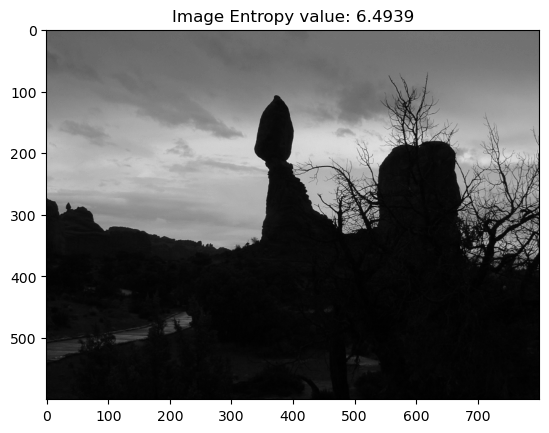

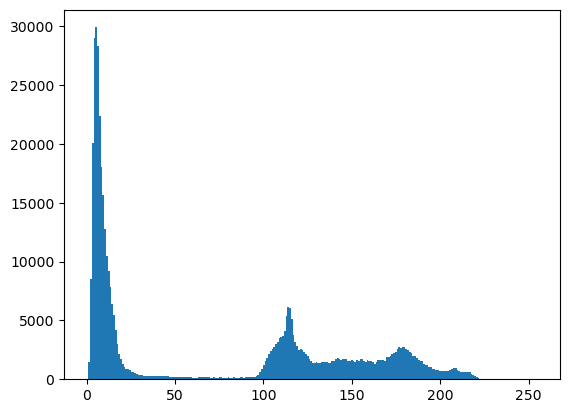

In [3]:
%matplotlib inline
import numpy as np
from imageio.v2 import imread
import matplotlib.pyplot as plt

def entropy(img):
    
    # Flatten the image to 1D array
    counts, _ = np.histogram(img, bins=256, range=(0, 256))  # change range

    # Normalize counts to probabilities
    probabilities = counts / counts.sum()

    # Filter out zero probabilities
    probabilities = probabilities[probabilities > 0]

    # Calculate entropy
    img_entropy = -np.sum(probabilities * np.log2(probabilities))
    
    return img_entropy

img = imread('images/dark.png')
result = entropy (img)
print ("Entropy value: {:.4f}".format(result))
plt.title("Image Entropy value: {:.4f}".format(result))
plt.imshow(img, vmin=0, vmax=255)
plt.show()

plt.hist(img.flatten(), 256, (0, 255))
plt.show()


### b) Example images

* construct an (artificial) image with high global contrast but low local contrast
* construct an (artificial) image with low global constrast but high local contrast
* construct an (artificial) image with maximal entropy but low local contrast

High global contrast, low local contrast
Global contrast: 1.0000 (1) , Local contrast: 0.0195 (256), Entropy: 2.5877 (8)


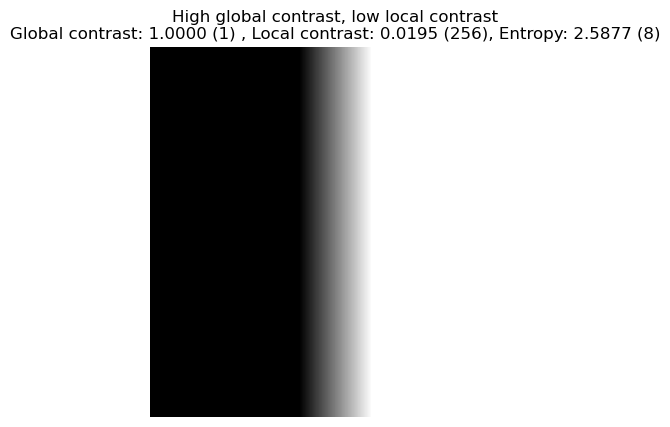

Low global contrast, high local contrast
Global contrast: 0.1529 (1) , Local contrast: 10.7983 (256), Entropy: 5.3216 (8)


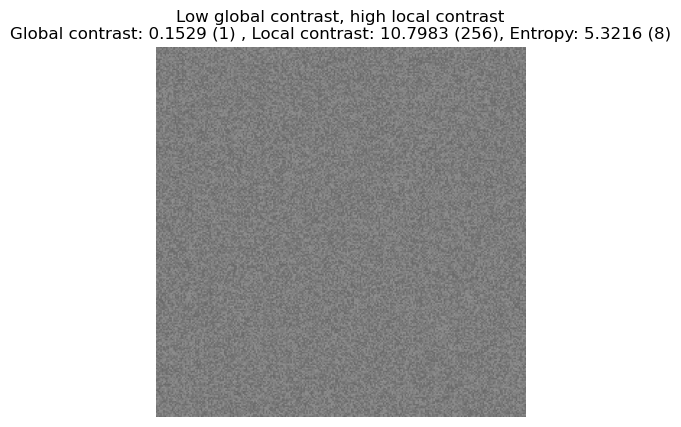

Maximal entropy, low local contrast
Global contrast: 0.0941 (1) , Local contrast: 1.1225 (256), Entropy: 3.7763 (8)


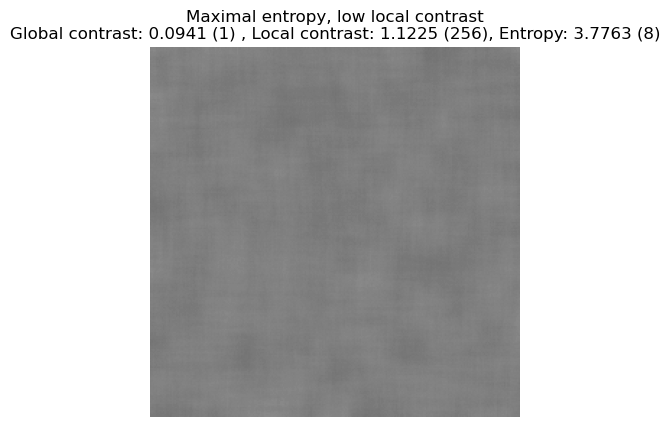

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter, convolve


def global_contrast_def(img, value_range=None): #Calculate global contrast as (max-min)/range.
    if value_range is None:
        value_range = (0, 255) if img.dtype == np.uint8 else (0., 1.)
    return (img.max() - img.min()) / (value_range[1] - value_range[0])

def local_contrast_def(img): #Calculate local contrast based on 4-neighborhood
    img = img.astype(np.float64)
    kernel = np.array([
        [0, 1, 0],
        [1, 0, 1],
        [0, 1, 0]
    ]) / 4.0
    neighbor_avg = convolve(img, kernel, mode='reflect')
    local_contrast = np.abs(img - neighbor_avg)
    return local_contrast.mean()

def entropy(img): #Calculate the entropy of an image

    # Flatten the image to 1D array
    counts, _ = np.histogram(img, bins=256, range=(0, 256)) 

    # Normalize counts to probabilities
    probabilities = counts / counts.sum()

    # Filter out zero probabilities
    probabilities = probabilities[probabilities > 0]

    # Calculate entropy
    img_entropy = -np.sum(probabilities * np.log2(probabilities))
    
    return img_entropy
    

def image_info(img, title="Image"):
    """Displays an image, local and global contrast, and the entropy."""
    global_c = global_contrast_def(img)
    local_c = local_contrast_def(img)
    img_entropy = entropy(img)

    info = f"Global contrast: {global_c:.4f} (1) , Local contrast: {local_c:.4f} (256), Entropy: {img_entropy:.4f} (8)"
    print(info)
    plt.title(f"{title}\n{info}")
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.show()


def image_hgc_llc(img1):  # High global contrast, low local contrast
    img1 = np.zeros((256, 256), dtype=np.uint8)
    img1[:, :128] = 0    # left half white
    img1[:, 128:] = 255  # right half black

    # Apply blur to reduce local contrast
    img1 = uniform_filter(img1, size=50)  # The larger the `size`, the less local contrast there is

    return img1


def image_lgc_hlc(img2):  # Low global contrast, high local contrast

    img2 = np.random.randint(125, 126, (256, 256), dtype=np.uint8)
    # noise for high local contrast
    noise = np.random.randint(-20, 20, (256, 256), dtype=np.int8)
    img2 = np.clip(img2 + noise, 0, 255).astype(np.uint8)
    return img2
    

def image_me_llc(img3):  # Maximal entropy, low local contrast
    # Image generation with uniform intensity distribution
    img3 = np.random.randint(0, 256, (256, 256), dtype=np.uint8)

    # Apply a stronger blur to reduce the local contrast
    img3 = uniform_filter(img3, size=25)  # Increase the degree of blur
    
    # uniform noise to increase entropy
    noise = np.random.randint(-2, 2, (256, 256), dtype=np.int8)
    img3 = np.clip(img3 + noise, 0, 255).astype(np.uint8)

    return img3

# Display all images
img1 = image_hgc_llc(None)
img2 = image_lgc_hlc(None)
img3 = image_me_llc(None)

print("High global contrast, low local contrast")
image_info(img1, "High global contrast, low local contrast")
print("Low global contrast, high local contrast")
image_info(img2, "Low global contrast, high local contrast")
print("Maximal entropy, low local contrast")
image_info(img3, "Maximal entropy, low local contrast")

## Assignment 2: Contrast enhancement (5 points)

### a) Image Contrast

Describe the concept of contrast in your own words and introduce different ways to measure it. How can low contrast be caused and when is this a problem (and when not)? What can be done to improve contrast?

YOUR ANSWER HERE

Contrast is the difference in intensity or color that allows objects in an image to stand out. It highlights the variation between bright and dark areas, making details more discernible. High contrast emphasizes differences, while low contrast results in a flat appearance where features may blend into the background.

Causes of Low Contrast:
Low contrast can occur due to poor lighting, haze, shadows, or overexposure. It may also result from sensor limitations or image compression. Such images appear washed out and lack visible detail.

When is Low Contrast a Problem?
Low contrast is problematic in applications where detail clarity is crucial, such as medical imaging, surveillance, or object detection. Important features may be hidden or indistinguishable.

When is Low Contrast Not a Problem?
It can be acceptable or even desirable in artistic photography, where soft transitions or reduced emphasis on details help achieve a particular mood. Similarly, low contrast is useful in reducing distractions in background elements.

What can be done to improve contrast?

1.	Histogram Equalization redistributes pixel values to stretch the intensity range.
2.	Gamma Correction adjusts the brightness curve to emphasize mid-tones.
3.	Adaptive Histogram Equalization (AHE) enhances local regions while avoiding over-amplification.
4.	Filtering Techniques (e.g., sharpening) enhance edges and textures.
5.	Lighting Adjustments in real-world scenarios reduce glare or improve illumination.




### b) Histogram equalization and entropy

How does histogram equalization work? What is entropy and how is it related to histogram equalization? For your answer focus on the (conceptually simpler) continuous case.

YOUR ANSWER HERE

How does histogram equalization work?

Histogram equalization redistributes intensity values in an image to enhance contrast. It uses the cumulative distribution function (CDF) of intensity levels to transform them into a uniform distribution. As a result, the pixel values are more evenly distributed, improving visibility and making details clearer.

If the intensity values are set in a discrete range (e.g., 0-255 for an 8-bit image), the uniform Y values are scaled back to that range.

The basic idea is that histogram equalization redistributes the image intensity values using CDFs to balance their occurrence frequencies. This improves visibility by ensuring that all intensity levels are effectively utilized.


What is entropy and how is it related to histogram equalization?

Entropy is a measure of information content or randomness in a system. In the context of images, entropy defines the variety of intensity levels. For a continuous probability distribution of intensity values p_X(x)

Histogram equalisation is a process aimed at increasing the entropy of an image by redistributing intensity values to achieve a uniform distribution. By distributing pixel intensities more evenly across the range, histogram equalisation maximises entropy, which corresponds to better utilisation of available intensity levels. This results in higher contrast and better visibility of details in the image.



### c) Discrete histogram equalization

What problems occur when considering discrete images (i.e. with discrete coordinates and a finite number of gray levels)? Explain the tables on the lecture slides (CV-02 slides 29-32).

YOUR ANSWER HERE

Discrete images with limited coordinates and a fixed number of grey levels face a number of problems. Converting continuous real-world details into discrete values causes loss of fine detail and introduces rounding errors, resulting in artefacts such as banding. High-frequency details can also be distorted by aliasing, and fixed grey levels limit dynamic range, making it difficult to capture extreme contrasts. In addition, operations such as histogram equalisation and filtering are less accurate due to these discrete limitations.


Slides 29-32 explain the process of histogram equalisation. Slide 29 shows how a cumulative distribution function (CDF) is used to transform the original intensities into new values to evenly distribute the pixels. Slide 30 shows how the histogram becomes more uniform after equalisation, increasing contrast. Slide 31 shows the original image with low contrast and its narrow histogram. Slide 32 shows the result of equalisation, where the image becomes more contrasty and the histogram is evenly distributed, improving the visibility of detail.

## Assignment 3: Adaptive Histogram Equalization (5 points)

We have uploaded the original article on Contrast Limited Adaptive Histogram Equalization to StudIP [Zuiderveld, 1994](Zuiderveld-1994.pdf). You may use it as a base to answer this exercise.

### a) Adaptive Histogram Equalization (AHE)

Describe in your own words the idea of AHE. Why was it introduced and what are its main drawbacks?

YOUR ANSWER HERE

Adaptive Histogram Equalization (AHE) is a technique used to enhance the contrast of an image by applying histogram equalization locally to smaller regions, or tiles, of the image instead of the entire image at once. This allows AHE to adapt to variations in local contrast, making it particularly effective for enhancing details in regions with varying illumination or low global contrast.

### b) Contrast Limited Adaptive Histogram Equalization (CLAHE)

Describe in your own words the idea of CLAHE. Why was it introduced and how does it work? 

YOUR ANSWER HERE

Contrast Limited Adaptive Histogram Equalization (CLAHE) is an image enhancement technique designed to improve the contrast of an image while minimizing artifacts and noise. It builds on Adaptive Histogram Equalization (AHE) but introduces a contrast limiting step to address some of AHE’s drawbacks.

### c) Computation of AHE

How can AHE be implemented efficiently? Explain how the interpolation scheme works, why it is a valid approximation, and why it improves the runtime? Can you think of another way to compute AHE efficiently?

YOUR ANSWER HERE

The efficiency of AHE can be improved by using interpolation schemes where histograms are computed for a grid of tiles, and the intensity transformations of pixels near boundaries are interpolated between neighbouring tiles. This approach is justified because intensity changes between tiles are usually smooth, and it improves runtime by reducing redundant histogram computations.

Other efficient methods include using a sliding window with incremental histogram updates or integral histograms, which quickly compute local histograms over a set of data. Another option is GPU acceleration, which uses parallelism to speed up processing. These methods retain the advantages of AHE but significantly reduce the computational cost.

### d) Applying AHE and CLAHE

Lookup functions for computing HE, AHE and CLAHE in the module `skimage.exposure` and apply them to the image `canada.png`. Compare your results to the lecture slides (CV-02, slide 24).

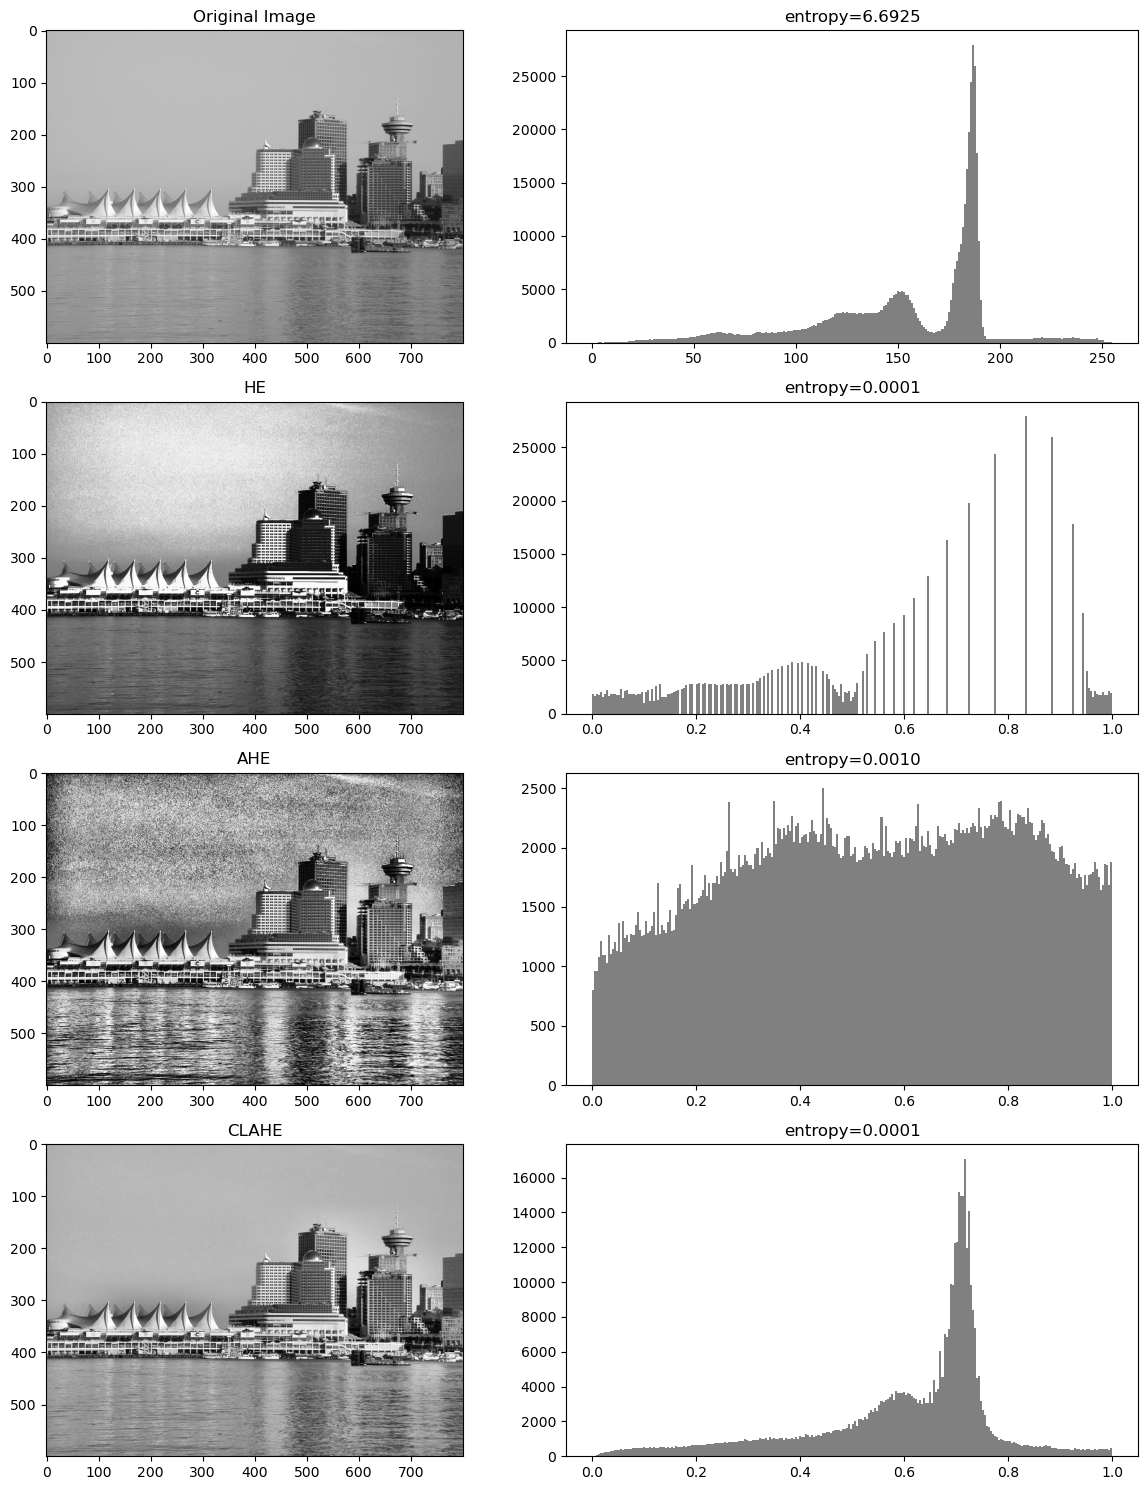

In [6]:
%matplotlib inline

from imageio.v2 import imread
from skimage.exposure import equalize_hist, equalize_adapthist
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate entropy
def entropy(img): #Calculate the entropy of an image

    # Flatten the image to 1D array
    counts, _ = np.histogram(img, bins=256, range=(0, 256)) 

    # Normalize counts to probabilities
    probabilities = counts / counts.sum()

    # Filter out zero probabilities
    probabilities = probabilities[probabilities > 0]

    # Calculate entropy
    img_entropy = -np.sum(probabilities * np.log2(probabilities))
    
    return img_entropy

# Load the image
img = imread('images/canada.png', pilmode='L')

# Apply global Histogram Equalization (HE)
img_he = equalize_hist(img)

# Apply Adaptive Histogram Equalization (AHE)
img_ahe = equalize_adapthist(img, clip_limit=1.0)  # Default AHE behavior

# Apply Contrast Limited Adaptive Histogram Equalization (CLAHE)
img_clahe = equalize_adapthist(img, clip_limit=0.01)  # Reduce clip_limit to control noise

# Plot results
plt.figure(figsize=(12, 15))

# Original Image
plt.subplot(4, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.subplot(4, 2, 2)
plt.title("entropy={:.4f}".format(entropy(img)))
plt.hist(img.flatten(), bins=256, range=(0, 255), color='gray')

# Histogram Equalization (HE)
plt.subplot(4, 2, 3)
plt.title("HE")
plt.imshow(img_he, cmap='gray')
plt.subplot(4, 2, 4)
plt.title("entropy={:.4f}".format(entropy(img_he)))
plt.hist(img_he.flatten(), bins=256, range=(0, 1), color='gray')  # `equalize_hist` normalizes to [0, 1]

# Adaptive Histogram Equalization (AHE)
plt.subplot(4, 2, 5)
plt.title("AHE")
plt.imshow(img_ahe, cmap='gray')
plt.subplot(4, 2, 6)
plt.title("entropy={:.4f}".format(entropy(img_ahe)))
plt.hist(img_ahe.flatten(), bins=256, range=(0, 1), color='gray')

# Contrast Limited Adaptive Histogram Equalization (CLAHE)
plt.subplot(4, 2, 7)
plt.title("CLAHE")
plt.imshow(img_clahe, cmap='gray')
plt.subplot(4, 2, 8)
plt.title("entropy={:.4f}".format(entropy(img_clahe)))
plt.hist(img_clahe.flatten(), bins=256, range=(0, 1), color='gray')

plt.tight_layout()
plt.show()

## Assignment 4: Colormaps (5 points)

Colormaps can be used to map a grayscale image to a pseudo color image for contrast enhancment for human viewing. Three non-monotonic functions are applied to map a gray value to each of the three color channels of the output image.


### a) Describe the following three colormap classes in one sentence each:

* Sequential
* Diverging
* Qualitative

You may have a look at the matplotlib documentation.

YOUR ANSWER HERE

- Sequential: Sequential color maps are used for data that evolves from low values to high values, usually using a single hue with changes in lightness or saturation.
	
- Diverging: Divergent color maps emphasize deviations from the center point by combining two contrasting colors that diverge from the neutral midpoint.

- Qualitative: Qualitative color maps are designed for categorical data, they use different colors that do not imply order or magnitude.

For each of the above colormap classes give one example and display the red, green, and blue curves like on (CV-02, slide 43):

/var/folders/s4/rxljrxqs5d9clp4yr9kwnvqc0000gn/T/ipykernel_11103/1532705823.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name, 256)


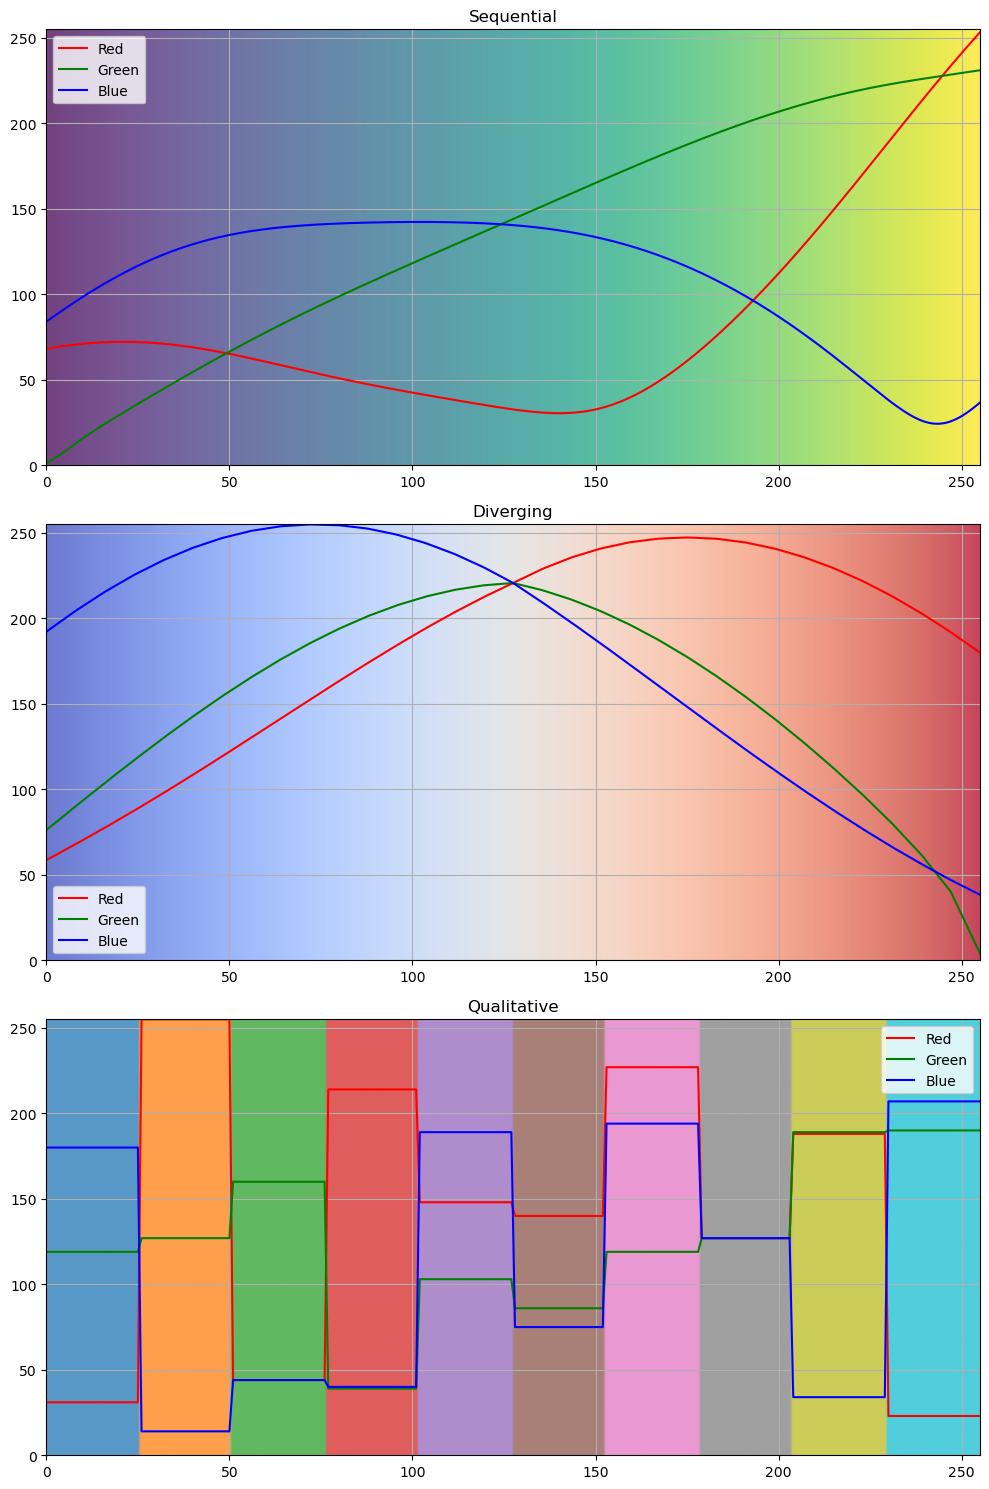

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Function to extract RGB channels and generate curves
def get_rgb_functions(cmap_name):
    cmap = cm.get_cmap(cmap_name, 256)
    values = np.linspace(0, 1, 256)
    colors = cmap(values)
    return (
        lambda x: np.interp(x, np.linspace(0, 255, len(colors[:, 0])), colors[:, 0] * 255),
        lambda x: np.interp(x, np.linspace(0, 255, len(colors[:, 1])), colors[:, 1] * 255),
        lambda x: np.interp(x, np.linspace(0, 255, len(colors[:, 2])), colors[:, 2] * 255),
    )

# Adding examples for Sequential, Diverging, and Qualitative colormap classes
colors = [
    (get_rgb_functions('viridis'), "Sequential"),
    (get_rgb_functions('coolwarm'), "Diverging"),
    (get_rgb_functions('tab10'), "Qualitative")
]

# Create a figure for all colormaps
fig, axs = plt.subplots(len(colors), 1, figsize=(10, 15))

gray = np.arange(0, 256)
a = np.tile(np.arange(256), (256, 1))

for i, (color, label) in enumerate(colors):
    # Plot the RGB curves
    axs[i].plot(gray, color[0](gray), 'r', label='Red')
    axs[i].plot(gray, color[1](gray), 'g', label='Green')
    axs[i].plot(gray, color[2](gray), 'b', label='Blue')

    # Ensure axis limits are consistent for gradient
    axs[i].set_xlim(0, 255)
    axs[i].set_ylim(0, 255)

    # Add a gradient image as a background for the RGB curves
    axs[i].imshow(
    np.stack([color[0](a), color[1](a), color[2](a)], axis=2) / 255,
    origin='lower',
    aspect='auto',
    alpha=0.75  # Reduced transparency
    )
    axs[i].set_title(f"{label}")
    axs[i].legend()
    axs[i].grid()

plt.tight_layout()
plt.show()

### b) Implement Cube Helix colormapping 
Generate a LookUp table with $256 \times 3$ entries describing the color values for all gray values beginning with black (0) up to white (255). Use the given parameters and use the following formula to compute an RGB value from a gray value $g$:
$$ \begin{pmatrix}R \\ G \\ B\end{pmatrix} =  
\begin{pmatrix} \lambda ^ \gamma \\ \lambda ^ \gamma \\ \lambda ^ \gamma \end{pmatrix} + a \begin{pmatrix}-0.14861 & + 1.78277 \\
-0.29227 & -0.90649 \\ +1.97294 & 0\end{pmatrix} \begin{pmatrix}\cos \phi \\ \sin \phi\end{pmatrix}$$
with $\phi = 2 \pi (\frac{\text{start\_color }}{3} + \text{rotations}\cdot \lambda)$ and $ a = \frac{\text{hue}\cdot \lambda ^ \gamma \cdot( 1 - \lambda ^ \gamma)}{2}$ (with 'start\_color', 'rotations' and 'hue' being parameters describing the form of the helix, and $\gamma$ being the usual $\gamma$-factor).

Remember that this formula is for values between $0$ and $1$.
For more information you may refer to http://astron-soc.in/bulletin/11June/289392011.pdf

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.003921568627451].


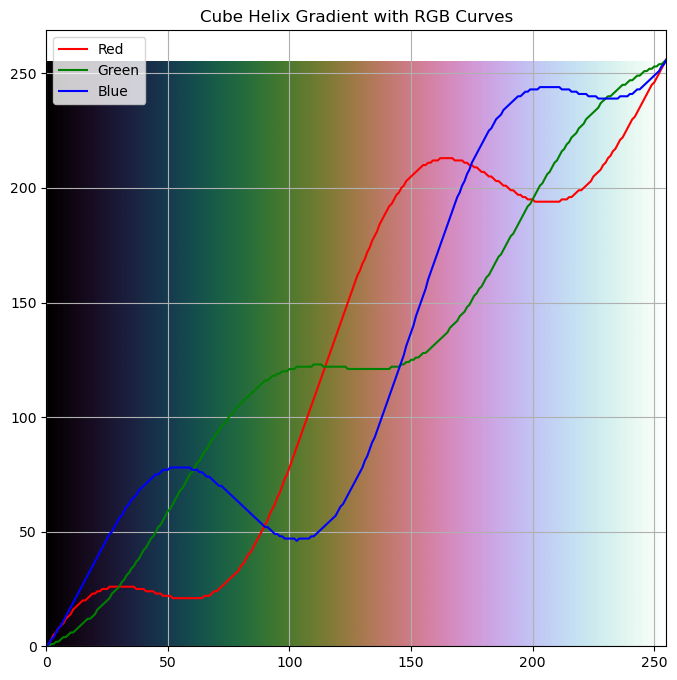

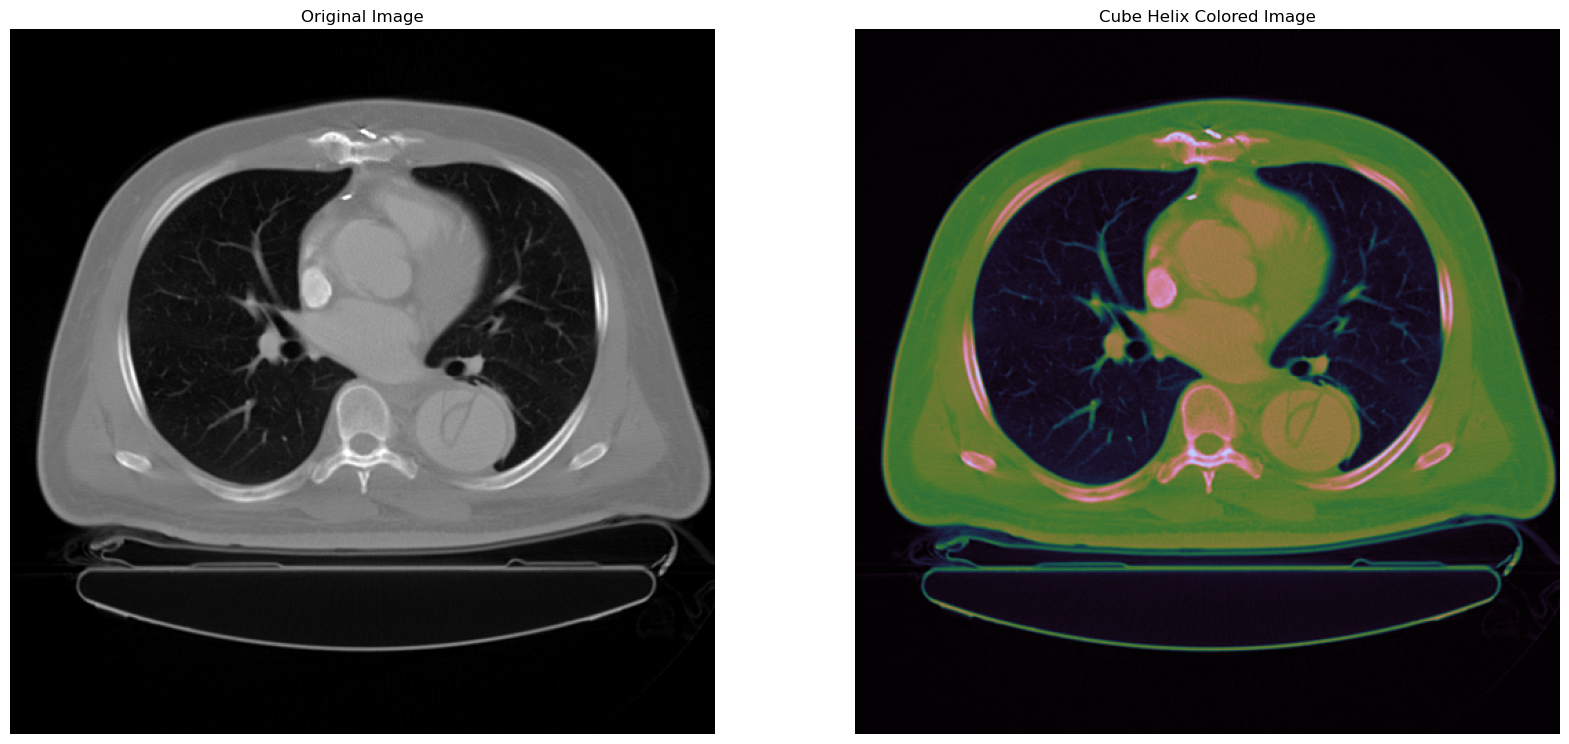

In [236]:
%matplotlib inline
import numpy as np
from imageio.v2 import imread
import matplotlib.pyplot as plt
import math

# Parameters for Cube Helix
start_color = 0.5
rotations = -1.5
hue = 1
gamma = 1

# Replace `np.mat` with `np.array` for compatibility
m = np.array([[-.14861, 1.78277],
              [-.29227, -.90649],
              [1.97294, 0]])

def generate_cube_helix_lookup_table():
    
    lookup_table = np.empty((256, 3), float)
    
    for i in range(256):
        # Compute normalized intensity
        g = i / 255.0
        λ = g ** gamma  # gamma correction
        φ = 2 * np.pi * (start_color / 3 + rotations * λ)  # angle for hue rotation
        a = hue * λ * (1 - λ) / 2  # amplitude factor
        
        # RGB computation
        rgb = λ + a * (m @ np.array([np.cos(φ), np.sin(φ)]))
        lookup_table[i] = np.clip(rgb, 0, 1)  # Ensure values are within [0, 1]
    
    return lookup_table

def apply_colormap(img, lookup_table):
    
    # Map grayscale values to RGB using the lookup table
    color_img = lookup_table[img]
    return np.clip(color_img, 0, 1)  # Ensure output is valid

# Load image
img = imread('images/lung.png', pilmode='L')

# Generate lookup table and apply the colormap
lookup_table = generate_cube_helix_lookup_table()
img2 = apply_colormap(img, lookup_table)

# Plot RGB curves and gradient
gray = np.arange(0, 256)
a = np.tile(np.arange(256), (256, 1))
int_table = (lookup_table * 256).astype(int)

# Show Cube Helix gradient with RGB curves overlayed
plt.figure(figsize=(8, 8))
plt.imshow(np.stack([int_table[a, 0], int_table[a, 1], int_table[a, 2]], axis=2) / 255, 
           origin='lower', extent=(0, 255, 0, 255), aspect='auto')
plt.plot(gray, int_table[:, 0], 'r', label="Red")    # Red curve
plt.plot(gray, int_table[:, 1], 'g', label="Green")  # Green curve
plt.plot(gray, int_table[:, 2], 'b', label="Blue")   # Blue curve
plt.legend()
plt.title("Cube Helix Gradient with RGB Curves")
plt.axis('on')  # Keep axes visible
plt.grid()      # Add grid for better visualization
plt.show()


# Compare original and colored images
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title("Cube Helix Colored Image")
plt.axis('off')
plt.show()

### Jet Colormap [Bonus]

Explain why the Jet Colormap (used, for example, as standard colormap in matlab), is problematic compared to Cube Helix. Think of perceived luminance and black and white printing.

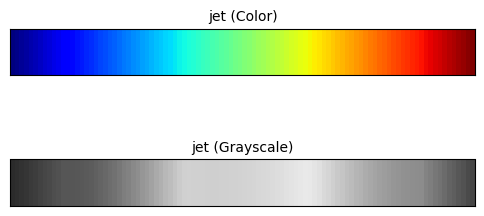

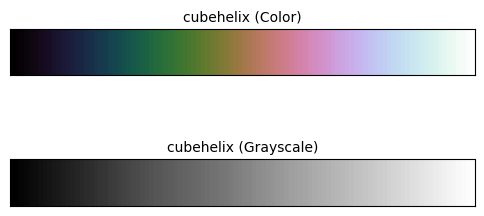

In [259]:
# This code was taken from 
# https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/

import numpy as np
import matplotlib.pyplot as plt

def grayify_cmap(cmap):
    """Return a grayscale version of the colormap
    
    Args:
        cmap (ndarray): RGB Colormap.
    
    Returns:
        (ndarray): Gray Colormap.
    """
    cmap = plt.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived greyscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return cmap.from_list(cmap.name + "_grayscale", colors, cmap.N)

def show_colormap(cmap):
    """Plots RGB colormap and grayified colormap
    
    Args: 
        cmap (ndarray): Colormap.
    """
    im = np.outer(np.ones(10), np.arange(100))
    fig, ax = plt.subplots(2, figsize=(6, 3),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.3)
    
    # Original colormap
    ax[0].imshow(im, cmap=cmap)
    ax[0].set_title(f"{cmap} (Color)", fontsize=10)
    
    # Grayified colormap
    ax[1].imshow(im, cmap=grayify_cmap(cmap))
    ax[1].set_title(f"{cmap} (Grayscale)", fontsize=10)

# Showing the jet colormap and its grayscale version
show_colormap('jet')

# Showing the cubehelix colormap and its grayscale version
show_colormap('cubehelix')

plt.show()

YOUR ANSWER HERE

The Jet colormap, commonly used in MATLAB, has several drawbacks when compared to CubeHelix, especially in terms of perceived luminance and grayscale printing. Jet introduces abrupt transitions in brightness, creating artificial boundaries that can distort the representation of data. These jumps in brightness may mislead viewers by highlighting areas that don’t correspond to actual features in the data.

When Jet is converted to grayscale, these luminance inconsistencies result in a noisy image, making the data difficult to interpret in black-and-white formats. On the other hand, Cube Helix ensures smooth, continuous changes in brightness, preserving the data’s integrity. Its grayscale conversion produces a visually consistent image, making CubeHelix a better choice for both color and grayscale applications.